In [40]:
import pandas as pd
import pyarrow.parquet as pq
from numpy import nan
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns

In [2]:
df_steam_games = pq.read_table('df_steam_games_1.parquet').to_pandas()

In [7]:
df_steam_games.columns

Index(['genres', 'app_name', 'tags', 'specs', 'price', 'id', 'developer',
       'anio'],
      dtype='object')

In [3]:
df_steam_games.tail()

,genres,app_name,tags,specs,price,id,developer,anio
2020045,none,maze run vr,vr,htc vive,4.99,681550,none,0
2020046,none,maze run vr,vr,oculus rift,4.99,681550,none,0
2020047,none,maze run vr,vr,tracked motion controllers,4.99,681550,none,0
2020048,none,maze run vr,vr,standing,4.99,681550,none,0
2020049,none,maze run vr,vr,room scale,4.99,681550,none,0


In [5]:
df_steam_games.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2020050 entries, 0 to 2020049
Data columns (total 8 columns):
 #   Column     Dtype 
---  ------     ----- 
 0   genres     object
 1   app_name   object
 2   tags       object
 3   specs      object
 4   price      object
 5   id         int64 
 6   developer  object
 7   anio       int64 
dtypes: int64(2), object(6)
memory usage: 123.3+ MB


In [6]:
df_steam_games.describe()

,id,anio
count,2.020050e+06,2.020050e+06
mean,4.321977e+05,1.934686e+03
std,1.671838e+05,3.948111e+02
min,0.000000e+00,0.000000e+00
25%,3.133810e+05,2.014000e+03
50%,4.233670e+05,2.016000e+03
75%,5.599600e+05,2.017000e+03
max,2.028850e+06,2.021000e+03


In [4]:
#Se eliminan las filas del dataframe que poseen nulos en todas las entradas

df_steam_games = df_steam_games.dropna(how='all')

In [8]:
#Se eliminan los  na de la colimna price
df_steam_games.dropna(subset=['price'], inplace=True)

In [9]:
rows_with_free = df_steam_games[df_steam_games['price'].str.contains(r'\bfree\b', case=False, regex=True)]

In [10]:
df_steam_games.loc[df_steam_games['price'].str.contains(r'\bfree\b', case=False, regex=True), 'price'] = '0.0'

In [11]:
len(rows_with_free)

0

In [12]:
df_steam_games['price'] = df_steam_games['price'].str.extract(r'(\d+.\d+)')

In [13]:
df_steam_games['price'].value_counts()

price
9.99      295013
4.99      232187
0.0       197368
14.99     185645
19.99     167605
           ...  
99.0           1
10.49          1
124.99         1
4.29           1
234.99         1
Name: count, Length: 147, dtype: int64

In [14]:
# Convierte las listas en la columna 'genres' en una cadena separada por comas
df_steam_games['genres'] = df_steam_games['genres'].apply(lambda x: str(x).replace('[', '').replace(']', ''))


# Separa la cadena por comas y agrega una fila por cada valor individual
df_steam_games['genres'] = df_steam_games['genres'].str.split(', ')
df_steam_games = df_steam_games.explode('genres')
df_steam_games['genres'] = df_steam_games['genres'].apply(lambda x: str(x).replace("'", ""))


In [19]:
# Cuenta la frecuencia de cada género
frecuencia_genero = df_steam_games['genres'].value_counts()


In [20]:
# Convierte las listas en la columna 'genres' en una cadena separada por comas
df_steam_games['tags'] = df_steam_games['tags'].apply(lambda x: str(x).replace('[', '').replace(']', ''))


# Separa la cadena por comas y agrega una fila por cada valor individual
df_steam_games['tags'] = df_steam_games['tags'].str.split(', ')
df_steam_games = df_steam_games.explode('tags')
df_steam_games['tags'] = df_steam_games['tags'].apply(lambda x: str(x).replace("'", ""))

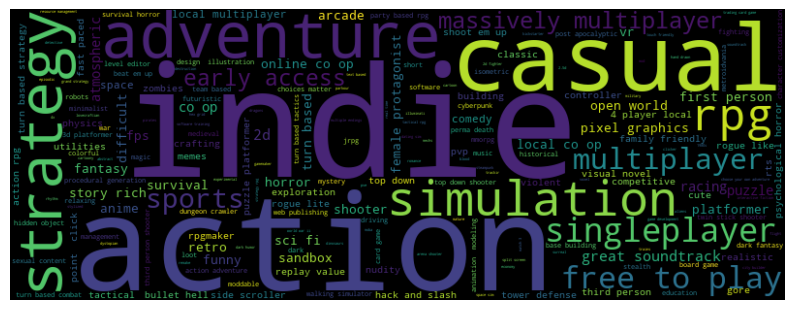

In [21]:
# Cuenta la frecuencia de cada género
frecuencia_genero = df_steam_games['tags'].value_counts()

# Crea la nube de palabras
wordcloud = WordCloud(width=800, height=300, background_color='black').generate_from_frequencies(frecuencia_genero)

# Muestra la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [22]:
# Convierte las listas en la columna 'genres' en una cadena separada por comas
df_steam_games['specs'] = df_steam_games['specs'].apply(lambda x: str(x).replace('[', '').replace(']', ''))


# Separa la cadena por comas y agrega una fila por cada valor individual
df_steam_games['specs'] = df_steam_games['specs'].str.split(', ')
df_steam_games = df_steam_games.explode('specs')
df_steam_games['specs'] = df_steam_games['specs'].apply(lambda x: str(x).replace("'", ""))

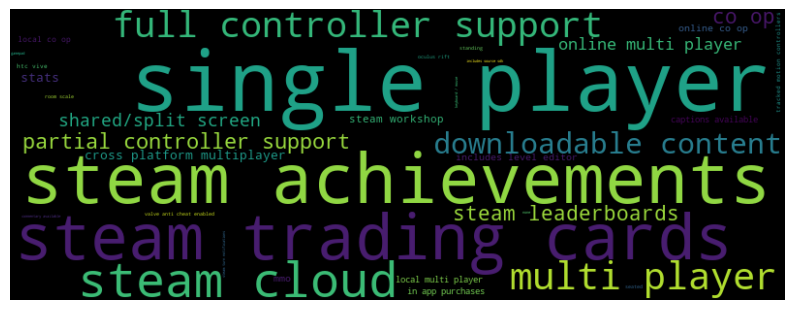

In [23]:
# Cuenta la frecuencia de cada género
frecuencia_genero = df_steam_games['specs'].value_counts()

# Crea la nube de palabras
wordcloud = WordCloud(width=800, height=300, background_color='black').generate_from_frequencies(frecuencia_genero)

# Muestra la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
df_steam_games['anio'] = df_steam_games['release_date'].str.extract(r'(\d{4})')

In [ ]:
df_steam_games['anio'][df_steam_games['anio'] == '5275'] = '2018'

In [ ]:
fecha = df_steam_games['release_date']
df_steam_games.drop('release_date', axis=1, inplace=True)

In [ ]:
df_steam_games.reset_index(drop=True, inplace=True)
df_steam_games.tail(2)

In [ ]:
df_steam_games['anio'].value_counts().sort_index().plot(kind='bar', figsize=(15, 5))

In [ ]:
df_steam_games.head(5)

In [ ]:

df_steam_games['app_name'].isnull().sum()

In [ ]:
df_steam_games['title'].isnull().sum()

In [ ]:
df_steam_games[df_steam_games['app_name'].isnull()]

In [ ]:
df_steam_games[df_steam_games['id'] == 317160]

In [ ]:
title = df_steam_games['title']

In [ ]:
df_steam_games.head()

In [ ]:
url = df_steam_games['url']
reviews_url = df_steam_games['reviews_url']

In [ ]:
# Se elimiina las dos columnas
df_steam_games.drop(columns=['url', 'reviews_url'], axis=1, inplace=True)

In [ ]:
df_steam_games.head()

In [ ]:
df_steam_games['developer'].isna().sum()

In [ ]:
lista1 = pd.Series(df_steam_games['publisher'])
lista2 = pd.Series(df_steam_games['developer'])

In [ ]:
# Llenar los vacíos de 'developer' con data de 'publisher'.

from numpy import nan

for i in range(len(lista1)):
  if lista2[i] is None:
    lista2[i] = lista1[i]
  else:
    continue

In [ ]:
df_steam_games['developer'].isna().sum()

In [ ]:
publisher = df_steam_games['publisher']

In [ ]:
df_steam_games.drop('publisher',axis=1,inplace=True)

In [ ]:
df_steam_games.head()

In [ ]:
early_access = df_steam_games['early_access']

In [ ]:
# se Elimina la columna early access
df_steam_games.drop('early_access', axis=1, inplace=True)

In [27]:
# Se convierte  los años nulos a 0 para transformarlos en enteros
df_steam_games['anio'][df_steam_games['anio'].isnull()] = 0

C:\Users\Blasferp\AppData\Local\Temp\ipykernel_4960\3340584265.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_steam_games['anio'][df_steam_games['anio'].isnull()] = 0


In [28]:
df_steam_games['anio'] = df_steam_games['anio'].astype(int)

In [29]:
df_steam_games['anio'][df_steam_games['anio'].isnull()]

Series([], Name: anio, dtype: int32)

In [30]:
type(df_steam_games['anio'][0])

numpy.int32

In [31]:
df_steam_games['id'].info()

<class 'pandas.core.series.Series'>
Index: 2020050 entries, 0 to 2020049
Series name: id
Non-Null Count    Dtype
--------------    -----
2020050 non-null  int64
dtypes: int64(1)
memory usage: 30.8 MB


In [32]:
""" Limpieza de caracteres especiales """
# Todos los strings en minúsculas
df_steam_games = df_steam_games.apply(lambda x: x.astype(str).str.lower() if x.dtype == "object" else x)

# Reemplaza '-' por ' ' en todas las columnas
df_steam_games = df_steam_games.apply(lambda x: x.str.replace('-', ' ') if x.dtype == "object" else x)

# Reemplaza '!' por '' en todas las columnas
df_steam_games = df_steam_games.apply(lambda x: x.str.replace('!', '') if x.dtype == "object" else x)

# Reemplaza '¡' por '' en todas las columnas
df_steam_games = df_steam_games.apply(lambda x: x.str.replace('¡', '') if x.dtype == "object" else x)

# Reemplaza '?' por '' en todas las columnas
df_steam_games = df_steam_games.apply(lambda x: x.str.replace('?', '') if x.dtype == "object" else x)

# Reemplaza '¿' por '' en todas las columnas
df_steam_games = df_steam_games.apply(lambda x: x.str.replace('¿', '') if x.dtype == "object" else x)

# Reemplaza '"' por '' en todas las columnas
df_steam_games = df_steam_games.apply(lambda x: x.str.replace('"', '') if x.dtype == "object" else x)

# Reemplaza ''' por '' en todas las columnas
df_steam_games = df_steam_games.apply(lambda x: x.str.replace("'", '') if x.dtype == "object" else x)

# Reemplaza ',' por '' en todas las columnas
df_steam_games = df_steam_games.apply(lambda x: x.str.replace(",", '') if x.dtype == "object" else x)

# Reemplaza '&' por '' en todas las columnas
df_steam_games = df_steam_games.apply(lambda x: x.str.replace("&", '') if x.dtype == "object" else x)

# Reemplaza "''" por '' en todas las columnas
df_steam_games = df_steam_games.apply(lambda x: x.str.replace("''", '') if x.dtype == "object" else x)

# Reemplaza "_" por '' en todas las columnas
df_steam_games = df_steam_games.apply(lambda x: x.str.replace("_", '') if x.dtype == "object" else x)

df_steam_games.head(2)

,genres,app_name,tags,specs,price,id,developer,anio
0,action,lost summoner kitty,strategy,single player,4.99,761140,kotoshiro,2018
1,action,lost summoner kitty,action,single player,4.99,761140,kotoshiro,2018


In [33]:
# Se reemplazan valores .0
df_steam_games['id'] = df_steam_games['id'].apply(lambda x: str(x).replace('.0', ''))

In [34]:
df_steam_games.head(2)

,genres,app_name,tags,specs,price,id,developer,anio
0,action,lost summoner kitty,strategy,single player,4.99,761140,kotoshiro,2018
1,action,lost summoner kitty,action,single player,4.99,761140,kotoshiro,2018


In [35]:
df_steam_games['id'] = pd.to_numeric(df_steam_games['id'], errors='coerce').fillna(0).astype(int)


In [36]:
df_steam_games.head()

,genres,app_name,tags,specs,price,id,developer,anio
0,action,lost summoner kitty,strategy,single player,4.99,761140,kotoshiro,2018
1,action,lost summoner kitty,action,single player,4.99,761140,kotoshiro,2018
2,action,lost summoner kitty,indie,single player,4.99,761140,kotoshiro,2018
3,action,lost summoner kitty,casual,single player,4.99,761140,kotoshiro,2018
4,action,lost summoner kitty,simulation,single player,4.99,761140,kotoshiro,2018


In [38]:
# Se guarda el archivo como parquet
df_steam_games.to_parquet('df_steam_games_1.parquet')

In [42]:
# Información general del DataFrame
df_steam_games.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2020050 entries, 0 to 2020049
Data columns (total 8 columns):
 #   Column     Dtype 
---  ------     ----- 
 0   genres     object
 1   app_name   object
 2   tags       object
 3   specs      object
 4   price      object
 5   id         int32 
 6   developer  object
 7   anio       int32 
dtypes: int32(2), object(6)
memory usage: 123.3+ MB


In [43]:
# Estadísticas descriptivas de las columnas numéricas
df_steam_games.describe()

,id,anio
count,2.020050e+06,2.020050e+06
mean,4.321977e+05,1.934686e+03
std,1.671838e+05,3.948111e+02
min,0.000000e+00,0.000000e+00
25%,3.133810e+05,2.014000e+03
50%,4.233670e+05,2.016000e+03
75%,5.599600e+05,2.017000e+03
max,2.028850e+06,2.021000e+03


In [44]:
# Conteo de valores únicos en las columnas categóricas
df_steam_games.nunique()

genres          23
app_name     30709
tags           340
specs           40
price          148
id           30756
developer    10570
anio            44
dtype: int64

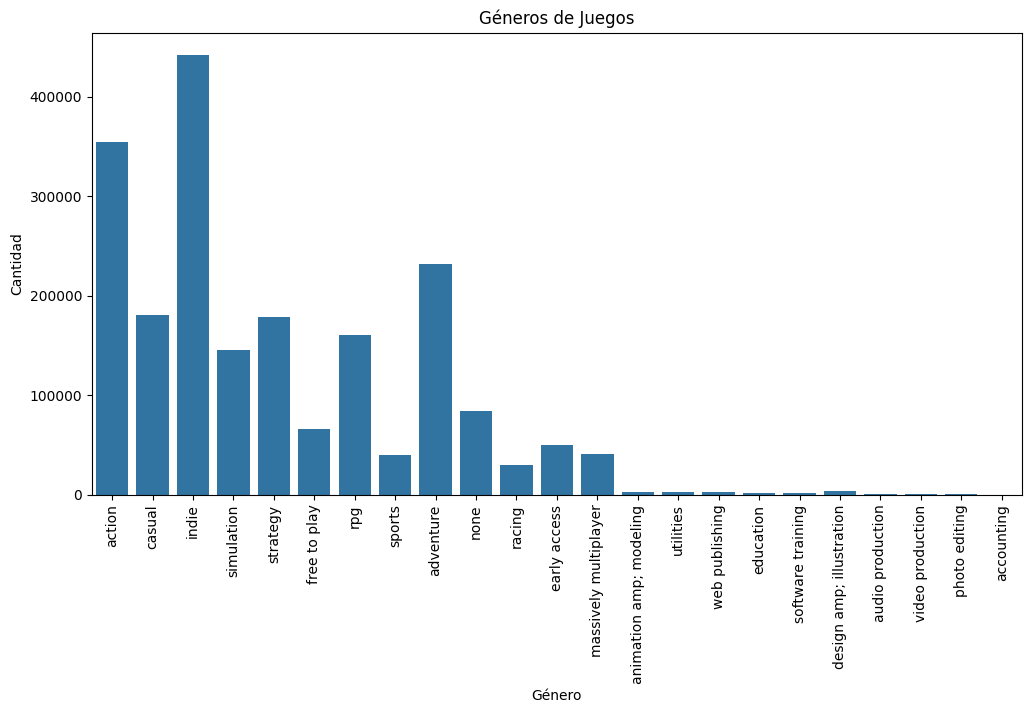

In [46]:
# Gráfico de barras de géneros
plt.figure(figsize=(12, 6))
sns.countplot(data=df_steam_games, x='genres')
plt.xticks(rotation=90)
plt.title("Géneros de Juegos")
plt.xlabel("Género")
plt.ylabel("Cantidad")
plt.show()